This project analyzes the challenges faced by Computer Science students in the EUI across different academic levels. It explores key factors such as stress levels, career preparedness, academic struggles, and coding difficulties to understand how students' experiences evolve throughout their education. By visualizing categorical and quantitative data, and computing statistical measures like mean, median, and mode, this study aims to identify patterns that can help improve support systems and resources for CS students at various stages of their academic journey.

In [ ]:
# Importing Libraries we will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [ ]:
# Importing the file
from google.colab import files
upload = files.upload()

Saving Final Data.csv to Final Data.csv


In [ ]:
# Checking the data
df= pd.read_csv('Final Data.csv')
df.head()

,Timestamp,Academic Level,What area of CS are you most interested in?,How difficult do you find CS coursework?,What are your biggest academic struggles in CS?,How confident are you in your coding skills?,What are your biggest struggles when coding?,How prepared do you feel for CS-related internships or jobs?,What challenges do you face when preparing for a CS career?,How stressful do you find being a CS student?,What mental or social challenges do you face as a CS student?
0,3/6/2025 18:07:59,Sophomore,AI,4,Keeping up with assignments & deadlines,4,Managing time for coding practice,3,Lack of internship/job opportunities,4,Burnout from workload
1,3/6/2025 18:23:09,Sophomore,"Software Engineering, Cybersecurity, Game Deve...",4,"Understanding complex concepts (e.g., algorith...",3,Applying theoretical knowledge in real project...,1,"Lack of internship/job opportunities, Building...",5,"Burnout from workload, Feeling isolated or lac..."
2,3/6/2025 18:37:45,Sophomore,"Software Engineering, Data Science, AI, Compet...",3,Finding good study resources,4,"Debugging & fixing errors, Managing time for c...",3,"Lack of internship/job opportunities, Imposter...",2,Difficulty balancing studies with personal life
3,3/6/2025 18:51:10,Sophomore,Competitive Programming,3,Keeping up with assignments & deadlines,4,Working on large codebases,2,Lack of internship/job opportunities,3,Feeling isolated or lacking a support system
4,3/6/2025 18:52:48,Sophomore,Software Engineering,4,"Understanding complex concepts (e.g., algorith...",2,Managing time for coding practice,1,Imposter syndrome (feeling like I’m not good e...,4,Pressure to always be improving skills


In [ ]:
# Counting students in each academic level
df["Academic Level"].value_counts()

,count
Academic Level,
Sophomore,35
Freshman,9
Junior,4
Senior,4


Cleaning the data

In [ ]:

df.columns = df.columns.str.strip()  # Remove any extra spaces
df.columns = df.columns.str.replace("\ufeff", "")  # Remove hidden Unicode characters

# Deleting Timestamp
df = df.drop(columns=["Timestamp"])

df.head()

,Academic Level,What area of CS are you most interested in?,How difficult do you find CS coursework?,What are your biggest academic struggles in CS?,How confident are you in your coding skills?,What are your biggest struggles when coding?,How prepared do you feel for CS-related internships or jobs?,What challenges do you face when preparing for a CS career?,How stressful do you find being a CS student?,What mental or social challenges do you face as a CS student?
0,Sophomore,AI,4,Keeping up with assignments & deadlines,4,Managing time for coding practice,3,Lack of internship/job opportunities,4,Burnout from workload
1,Sophomore,"Software Engineering, Cybersecurity, Game Deve...",4,"Understanding complex concepts (e.g., algorith...",3,Applying theoretical knowledge in real project...,1,"Lack of internship/job opportunities, Building...",5,"Burnout from workload, Feeling isolated or lac..."
2,Sophomore,"Software Engineering, Data Science, AI, Compet...",3,Finding good study resources,4,"Debugging & fixing errors, Managing time for c...",3,"Lack of internship/job opportunities, Imposter...",2,Difficulty balancing studies with personal life
3,Sophomore,Competitive Programming,3,Keeping up with assignments & deadlines,4,Working on large codebases,2,Lack of internship/job opportunities,3,Feeling isolated or lacking a support system
4,Sophomore,Software Engineering,4,"Understanding complex concepts (e.g., algorith...",2,Managing time for coding practice,1,Imposter syndrome (feeling like I’m not good e...,4,Pressure to always be improving skills


In [ ]:
#Checking Data Types
df.dtypes

,0
Academic Level,object
What area of CS are you most interested in?,object
How difficult do you find CS coursework?,int64
What are your biggest academic struggles in CS?,object
How confident are you in your coding skills?,int64
What are your biggest struggles when coding?,object
How prepared do you feel for CS-related internships or jobs?,int64
What challenges do you face when preparing for a CS career?,object
How stressful do you find being a CS student?,int64
What mental or social challenges do you face as a CS student?,object


Removing any data from the "Others" section to maintain clarity and avoid ambiguity.

In [ ]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Define valid responses for categorical columns
valid_responses = {
    "Academic Level": ["Freshman", "Sophomore", "Junior", "Senior"],
    "What area of CS are you most interested in?": ["Cybersecurity", "AI", "Software Engineering", "Data Science", "Competitive Programming", "Game Development"],
    "What are your biggest academic struggles in CS?": [
        "Understanding complex concepts (e.g., algorithms, data structures)",
        "Keeping up with assignments & deadlines",
        "Finding good study resources",
        "Mathematics requirements (e.g., calculus, discrete math)"
    ],
    "What are your biggest struggles when coding?": [
        "Applying theoretical knowledge in real projects",
        "Working on large codebases",
        "Managing time for coding practice",
        "Debugging & fixing errors",
        "Understanding new programming languages"
    ],
    "What challenges do you face when preparing for a CS career?": [
        "Building a strong portfolio or resume",
        "Imposter syndrome (feeling like I’m not good enough)",
        "Lack of internship/job opportunities",
        "Lack of networking opportunities",
        "Struggles with technical interviews"
    ],
    "What mental or social challenges do you face as a CS student?": [
        "Pressure to always be improving skills",
        "Burnout from workload",
        "Difficulty balancing studies with personal life",
        "Feeling isolated or lacking a support system"
    ]
}

# Function to filter only categorical columns
def clean_data(df, valid_responses):
    for column, valid_values in valid_responses.items():
        df = df[df[column].isin(valid_values)]

    # Reset index after filtering
    df = df.reset_index(drop=True)
    return df

# Apply cleaning (only for categorical columns)
df_cleaned = clean_data(df, valid_responses)

# Show cleaned data
df_cleaned.head()



,Academic Level,What area of CS are you most interested in?,How difficult do you find CS coursework?,What are your biggest academic struggles in CS?,How confident are you in your coding skills?,What are your biggest struggles when coding?,How prepared do you feel for CS-related internships or jobs?,What challenges do you face when preparing for a CS career?,How stressful do you find being a CS student?,What mental or social challenges do you face as a CS student?
0,Sophomore,AI,4,Keeping up with assignments & deadlines,4,Managing time for coding practice,3,Lack of internship/job opportunities,4,Burnout from workload
1,Sophomore,Competitive Programming,3,Keeping up with assignments & deadlines,4,Working on large codebases,2,Lack of internship/job opportunities,3,Feeling isolated or lacking a support system
2,Sophomore,Software Engineering,4,"Understanding complex concepts (e.g., algorith...",2,Managing time for coding practice,1,Imposter syndrome (feeling like I’m not good e...,4,Pressure to always be improving skills
3,Junior,AI,3,Finding good study resources,4,Working on large codebases,4,Imposter syndrome (feeling like I’m not good e...,5,Burnout from workload
4,Freshman,Cybersecurity,4,Finding good study resources,2,Managing time for coding practice,3,Building a strong portfolio or resume,2,Burnout from workload


In [ ]:
# Data After cleaning
df_cleaned["Academic Level"].value_counts()

,count
Academic Level,
Sophomore,31
Freshman,6
Junior,4
Senior,3


Data Visualization

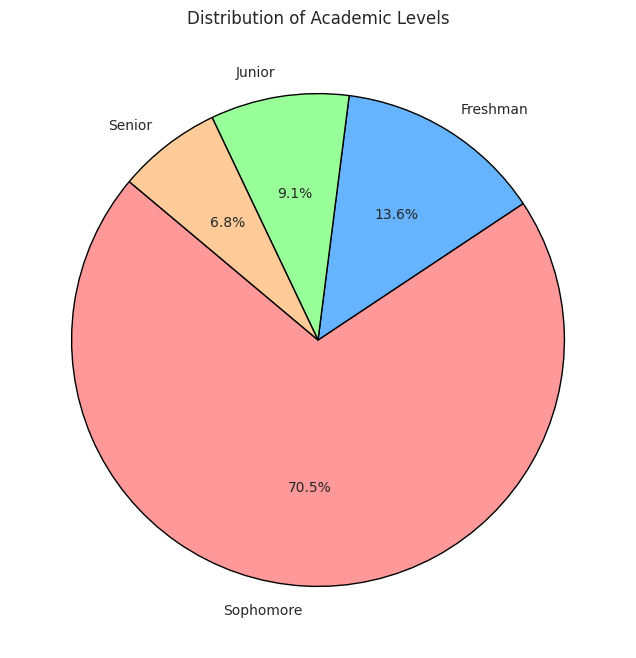

In [ ]:
# Pie Chart to compare Academic Level Counts

# Count occurrences of each academic level
academic_counts = df_cleaned["Academic Level"].value_counts()

# Define colors for better visualization
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    academic_counts,
    labels=academic_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    wedgeprops={"edgecolor": "black"}
)
plt.title("Distribution of Academic Levels")
plt.show()

In [ ]:
# Categorical Data Visualization

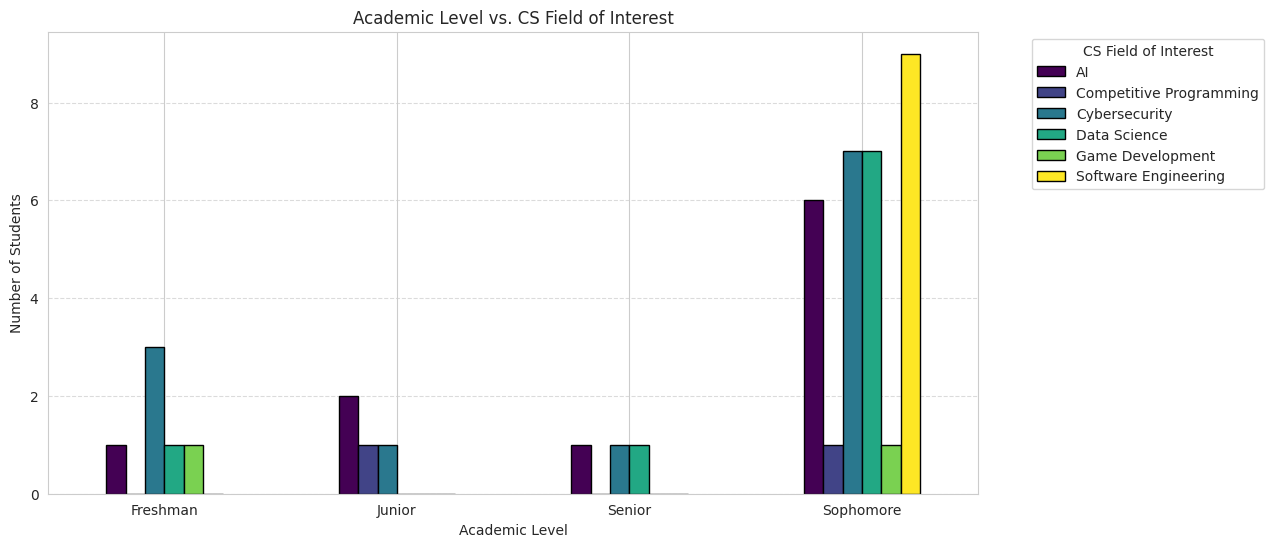

In [ ]:
# Bar Chart to compare Academic Level to field interests

# Count occurrences of each field within each academic level
field_counts = df_cleaned.groupby(["Academic Level", "What area of CS are you most interested in?"]).size().unstack()

# Plot the grouped bar chart
field_counts.plot(kind="bar",  figsize=(12, 6), colormap="viridis", edgecolor="black")

plt.title("Academic Level vs. CS Field of Interest")
plt.xlabel("Academic Level")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.legend(title="CS Field of Interest", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

The chart indicates that Software Engineering has the highest level of interest among students, particularly at the sophomore level. Cybersecurity and AI also attract significant attention. In contrast, fields like Game Development and Competitive Programming show comparatively lower levels of interest across academic levels. This suggests that students are more inclined toward industry-driven fields, while niche or specialized areas may attract fewer students

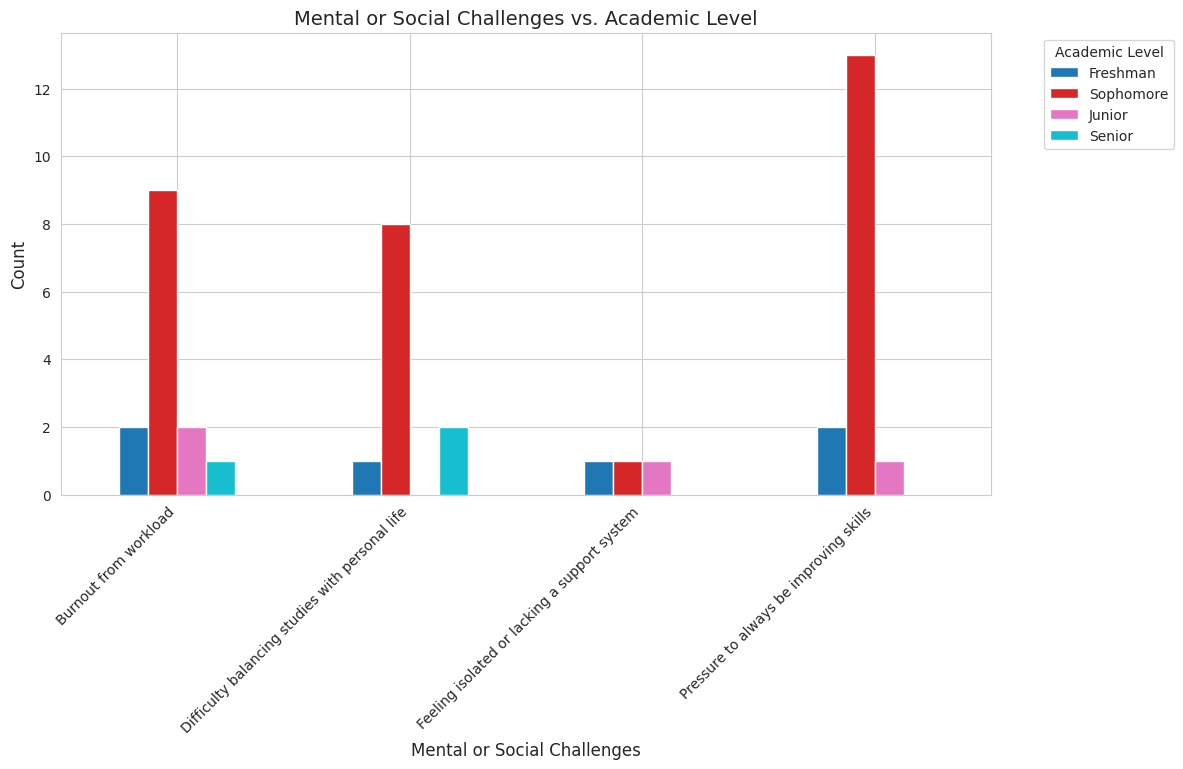

In [ ]:
# Bar Chart to compare Mental challanges vs. Academic Level

# Create a frequency table (cross-tabulation)
challenges_vs_academic = pd.crosstab(
    df_cleaned["What mental or social challenges do you face as a CS student?"],
    df_cleaned["Academic Level"]
)

# Plot the grouped bar chart
challenges_vs_academic.plot(kind="bar", colormap="tab10", figsize=(12, 6))

# Add labels and title
plt.xlabel("Mental or Social Challenges", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Mental or Social Challenges vs. Academic Level", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Academic Level", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.show()

The chart highlights that sophomores experience the highest levels of mental and social challenges, particularly in terms of burnout from workload and the pressure to always be improving skills. These factors may indicate that students at this stage face increased academic expectations and competition. Meanwhile, challenges like feeling isolated or lacking a support system appear to be less common across all academic levels. The differences across levels suggest that as students progress, they might develop coping strategies or gain better support networks.


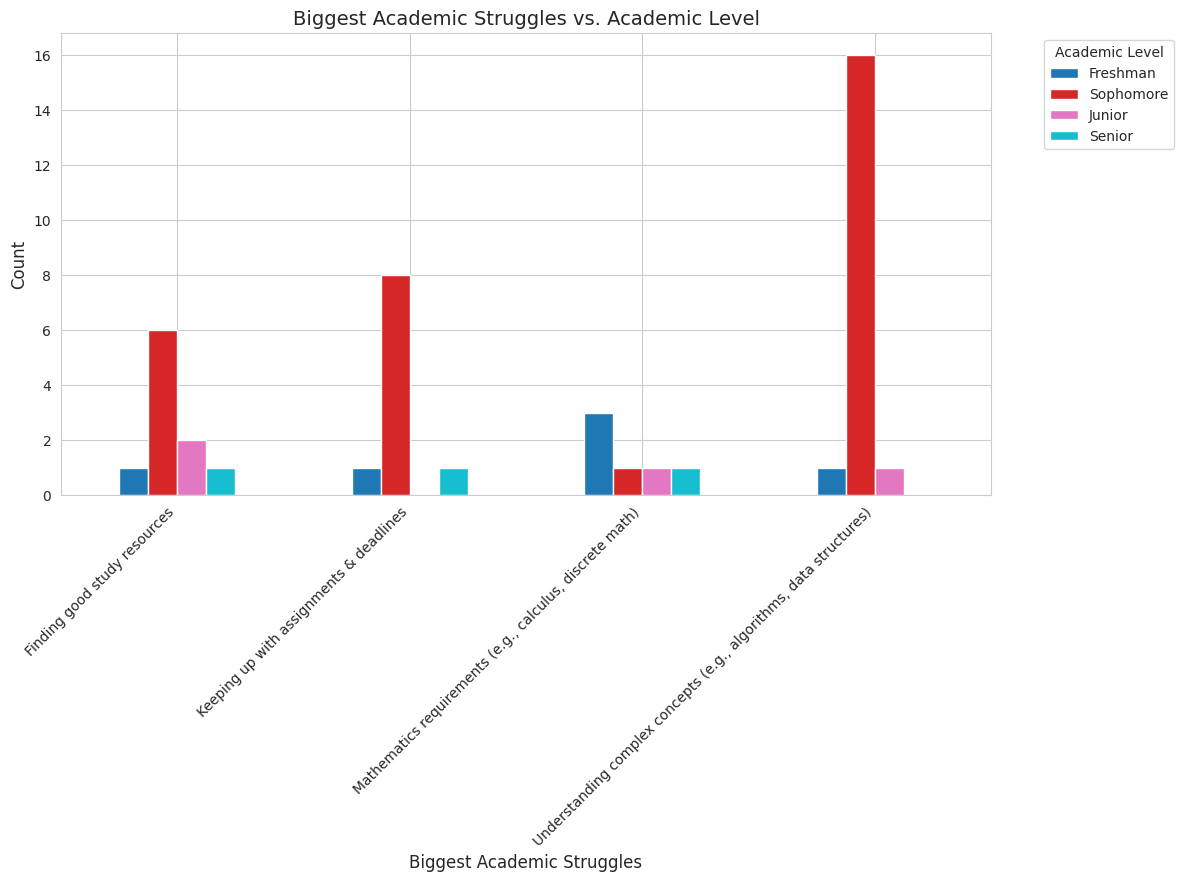

In [ ]:
# Bar Chart to compare Academic Struggles vs. Academic Level

# Create a frequency table (cross-tabulation)
struggles_vs_academic = pd.crosstab(
    df_cleaned["What are your biggest academic struggles in CS?"],
    df_cleaned["Academic Level"]
)

# Plot the grouped bar chart
struggles_vs_academic.plot(kind="bar", colormap="tab10", figsize=(12, 6))

# Add labels and title
plt.xlabel("Biggest Academic Struggles", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Biggest Academic Struggles vs. Academic Level", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Academic Level", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.show()

The chart shows that sophomores struggle the most with understanding complex concepts like algorithms and data structures, as well as keeping up with assignments and deadlines. This suggests that coursework intensity significantly increases at this stage. Finding good study resources is also a notable challenge, particularly among sophomores, indicating a potential gap in accessible learning materials. Meanwhile, freshmen report more struggles with math requirements, which could be due to the transition from high school to university-level coursework. The struggles appear to decrease in higher academic levels, suggesting students adapt over time.

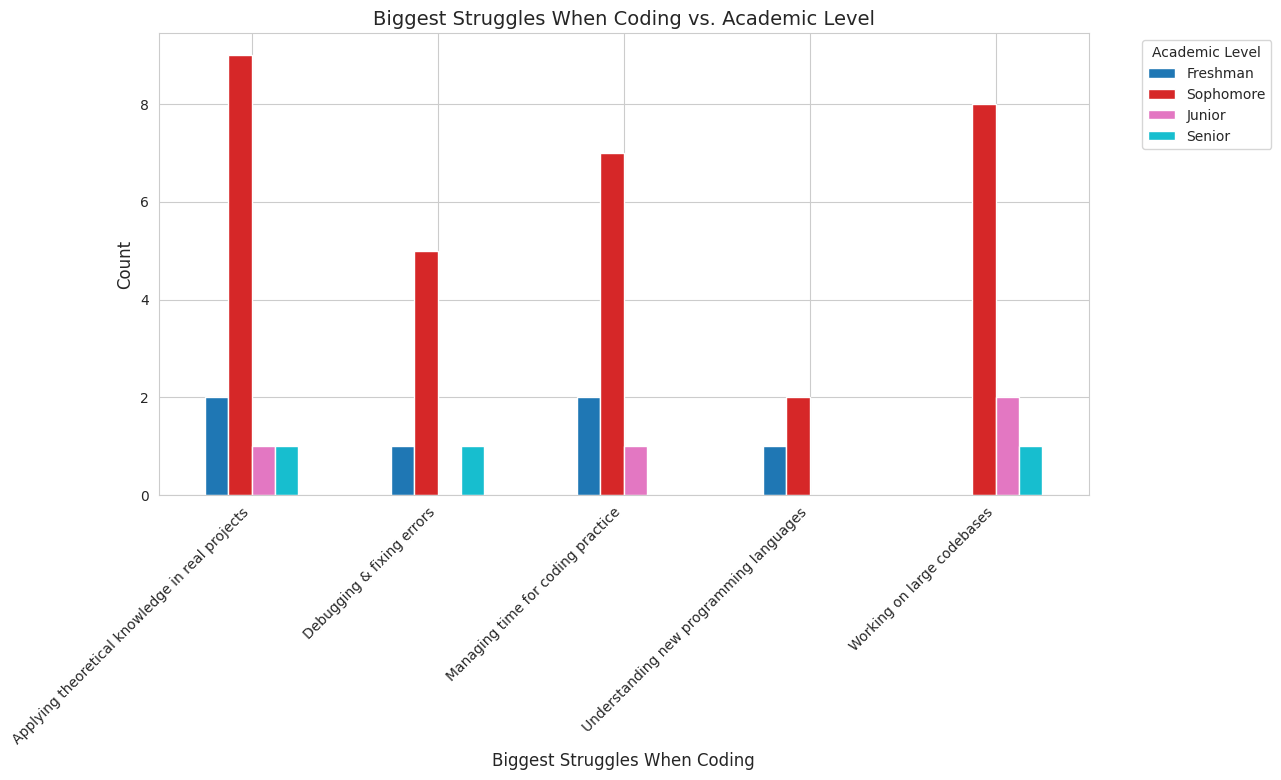

In [ ]:
# Bar Chart to compare Coding Struggles vs. Academic Level

# Create a frequency table (cross-tabulation)
coding_struggles_vs_academic = pd.crosstab(
    df_cleaned["What are your biggest struggles when coding?"],
    df_cleaned["Academic Level"]
)

# Plot the grouped bar chart
coding_struggles_vs_academic.plot(kind="bar", colormap="tab10", figsize=(12, 6))

# Add labels and title
plt.xlabel("Biggest Struggles When Coding", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Biggest Struggles When Coding vs. Academic Level", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Academic Level", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.show()

Freshmen and sophomores struggle the most, with sophomores finding applying theory to projects and working on large codebases especially challenging. Freshmen mainly struggle with debugging and time management.

Juniors and seniors face fewer difficulties, likely due to increased experience, making coding tasks more manageable.


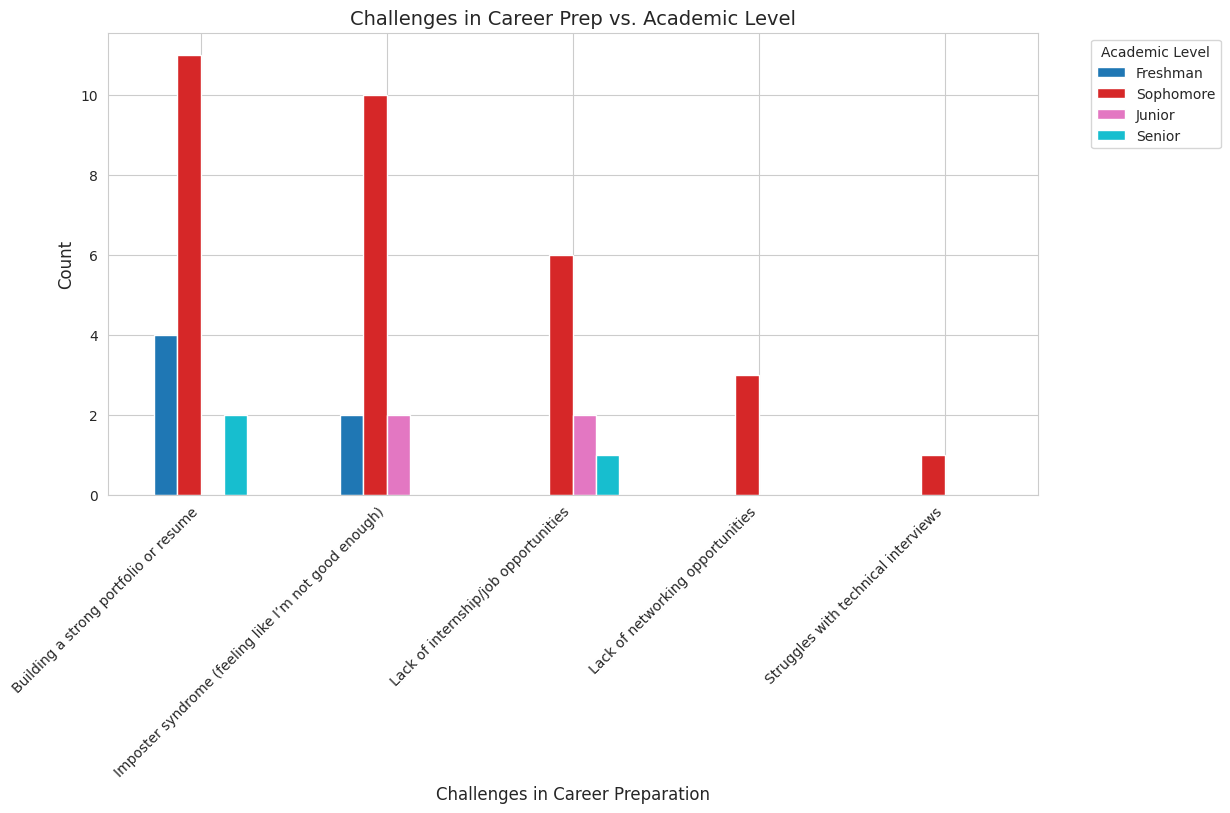

In [ ]:
# Bar Chart to compare Challanges in career prepration vs. Academic Level

# Create a frequency table (cross-tabulation)
career_challenges_vs_academic = pd.crosstab(
    df_cleaned["What challenges do you face when preparing for a CS career?"],
    df_cleaned["Academic Level"]
)

# Plot the grouped bar chart
career_challenges_vs_academic.plot(kind="bar", colormap="tab10", figsize=(12, 6))

# Add labels and title
plt.xlabel("Challenges in Career Preparation", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Challenges in Career Prep vs. Academic Level", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Academic Level", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.show()


Sophomores struggle the most, especially with building a strong portfolio and imposter syndrome. Freshmen also face these challenges but to a lesser extent.

Juniors and seniors experience fewer difficulties, likely due to gained experience and better preparation.

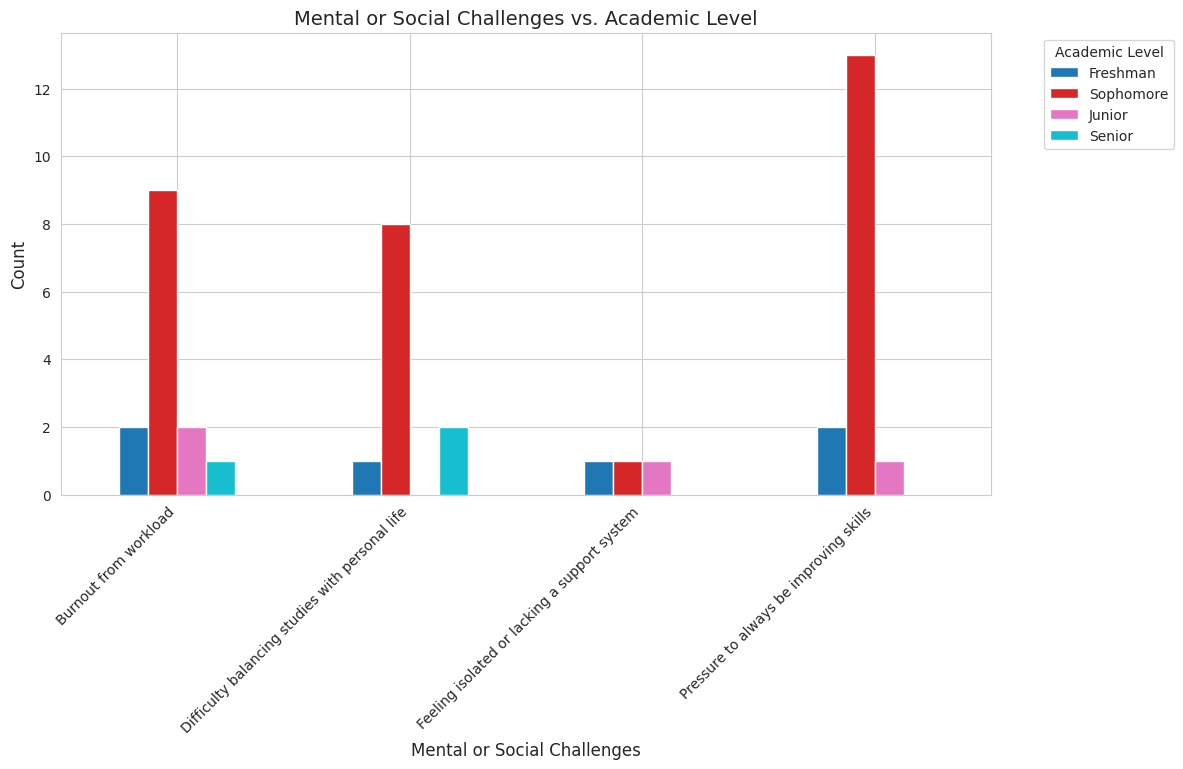

In [ ]:
# Bar Chart to compare Mental Challanges vs. Academic Level
# Create a frequency table (cross-tabulation)
mental_social_vs_academic = pd.crosstab(
    df_cleaned["What mental or social challenges do you face as a CS student?"],
    df_cleaned["Academic Level"]
)

# Plot the grouped bar chart
mental_social_vs_academic.plot(kind="bar", colormap="tab10", figsize=(12, 6))

# Add labels and title
plt.xlabel("Mental or Social Challenges", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Mental or Social Challenges vs. Academic Level", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Academic Level", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.show()

Freshmen struggle the most with the pressure to always be improving their skills, while sophomores experience the highest levels of burnout from workload. Juniors find it most difficult to balance their studies with personal life, whereas seniors primarily struggle with feeling isolated or lacking a support system.

In [ ]:
# Quantitative Data Visualization

<ipython-input-57-c637e5eb3971>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Academic Level", y="How confident are you in your coding skills?",


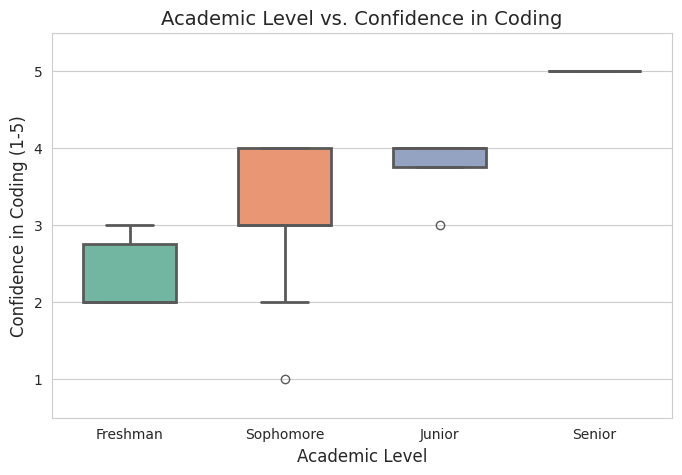

In [ ]:
# Box Plot to compare the academic level to their confidence in coding
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# Create the box plot with correct ordering
sns.boxplot(x="Academic Level", y="How confident are you in your coding skills?",
            data=df_cleaned, palette="Set2", order=["Freshman", "Sophomore", "Junior", "Senior"],
            showcaps=True, showfliers=True, width=0.6, linewidth=2)
plt.ylim(0.5, 5.5)

# Add labels & title
plt.xlabel("Academic Level", fontsize=12)
plt.ylabel("Confidence in Coding (1-5)", fontsize=12)
plt.title("Academic Level vs. Confidence in Coding", fontsize=14)

plt.show()

The box plot shows the distribution of confidence in coding across different academic levels.

Freshmen have the lowest confidence, mostly between 2 and 3, with little variation.

Sophomores show a wider range, from 1 to 4, indicating more variability in confidence levels.

Juniors tend to have a more stable confidence level around 4, with a few lower outliers.

Seniors have the highest confidence, with their scores reaching 5, showing strong self-assurance in coding.

Overall, confidence in coding generally increases with academic level, with some variability in the middle years.

In [ ]:

# Calculating the Mean, Median, Mode for confidence level in coding
mean_values = df_cleaned.groupby("Academic Level", observed=True)["How confident are you in your coding skills?"].mean().round(2)
median_values = df_cleaned.groupby("Academic Level", observed=True)["How confident are you in your coding skills?"].median()
mode_values = df_cleaned.groupby("Academic Level", observed=True)["How confident are you in your coding skills?"].agg(lambda x: stats.mode(x, keepdims=True).mode[0] if not x.empty else None)

# Combine into a DataFrame
summary_table = pd.DataFrame({
    "Mean ": mean_values,  # Convert to int for cleaner display
    "Median": median_values,
    "Mode": mode_values
})

# Display table
print(summary_table)

                Mean   Median  Mode
Academic Level                     
Freshman         2.33     2.0     2
Sophomore        3.13     3.0     3
Junior           3.75     4.0     4
Senior           5.00     5.0     5


<ipython-input-59-2be441b3d705>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Academic Level",


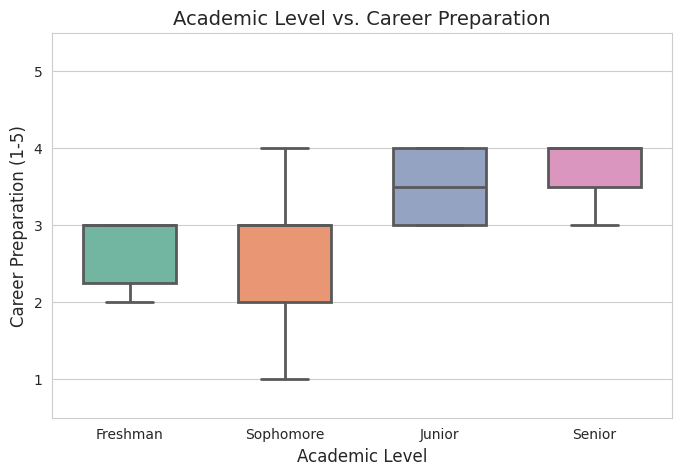

In [ ]:
# Box Plot to compare the academic level to Career Prepration
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# Create the box plot
sns.boxplot(x="Academic Level",
            y="How prepared do you feel for CS-related internships or jobs?",
            data=df_cleaned,
            palette="Set2",
            order=["Freshman", "Sophomore", "Junior", "Senior"],
            showcaps=True, showfliers=True, width=0.6, linewidth=2)

# Adjust y-axis scale to fit all values
plt.ylim(0.5, 5.5)

# Add labels & title
plt.xlabel("Academic Level", fontsize=12)
plt.ylabel("Career Preparation (1-5)", fontsize=12)
plt.title("Academic Level vs. Career Preparation", fontsize=14)

# Show plot
plt.show()

The box plot shows career preparation levels across different academic years.

Freshmen have low career preparation, mostly around 2-3, with little variation.

Sophomores show the widest range, from 1 to 4, indicating some students are just starting while others are progressing.

Juniors have a more stable preparation level, mostly between 3 and 4, showing increasing readiness.

Seniors have the highest preparation levels, clustered around 4, with little variation, indicating strong career readiness.

Overall, career preparation improves with academic progression, with the biggest variability seen in sophomores.

In [ ]:

# Calculating Mean, Median, Mode for career prepration level
mean_values = df_cleaned.groupby("Academic Level", observed=True)["How prepared do you feel for CS-related internships or jobs?"].mean().round(2)
median_values = df_cleaned.groupby("Academic Level", observed=True)["How prepared do you feel for CS-related internships or jobs?"].median()
mode_values = df_cleaned.groupby("Academic Level", observed=True)["How prepared do you feel for CS-related internships or jobs?"].agg(lambda x: stats.mode(x, keepdims=True).mode[0] if not x.empty else None)

# Combine into a DataFrame
summary_table = pd.DataFrame({
    "Mean ": mean_values,  # Convert to int for cleaner display
    "Median": median_values,
    "Mode": mode_values
})

# Display table
print(summary_table)

                Mean   Median  Mode
Academic Level                     
Freshman         2.67     3.0     3
Sophomore        2.58     3.0     2
Junior           3.50     3.5     3
Senior           3.67     4.0     4


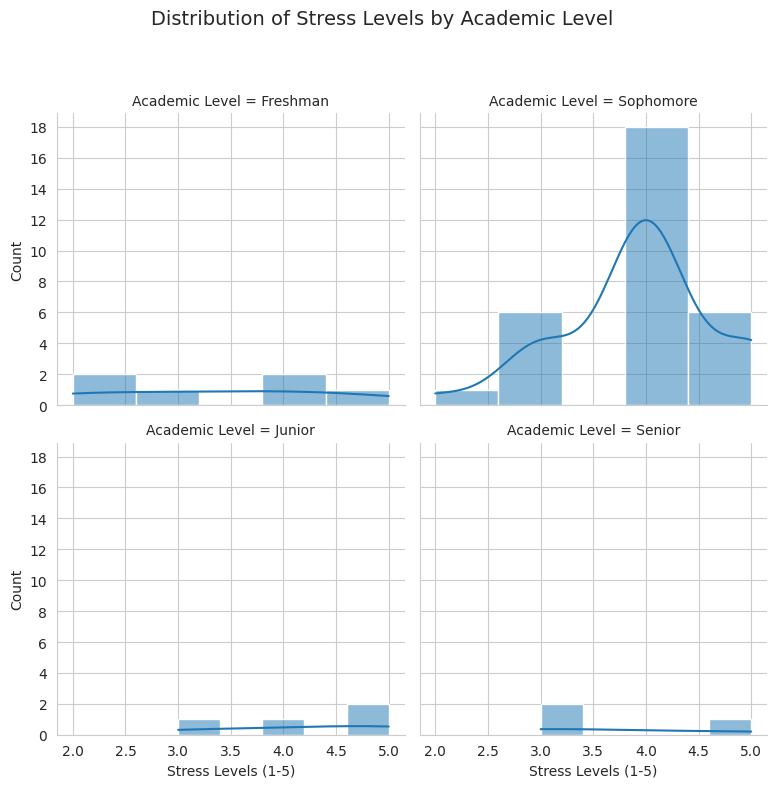

In [ ]:
# Using Histograms to compare academic level to stress levels

# Ensure Academic Level is a categorical variable with the correct order
academic_order = ["Freshman", "Sophomore", "Junior", "Senior"]
df_cleaned["Academic Level"] = pd.Categorical(df_cleaned["Academic Level"], categories=academic_order, ordered=True)

g = sns.FacetGrid(df_cleaned, col="Academic Level", col_wrap=2, height=4, sharex=True, sharey=True)


g.map(sns.histplot, "How stressful do you find being a CS student?", bins=5, kde=True)

# Ensure y-axis ticks are whole numbers
for ax in g.axes.flat:
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Adjust labels and title
g.set_axis_labels("Stress Levels (1-5)", "Count")
plt.subplots_adjust(top=0.85)  # Prevents title from overlapping
g.fig.suptitle("Distribution of Stress Levels by Academic Level", fontsize=14)

plt.show()


This visualization shows the distribution of stress levels (rated 1-5) across different academic levels.

Freshmen and Juniors have relatively low stress levels, with only a few students reporting high stress.

Sophomores experience the highest stress levels, with a peak around 4-5, indicating that they struggle the most.

Seniors show some stress but not as extreme as sophomores, suggesting that they might have adapted or managed their workload better.

Overall, stress appears to peak in the sophomore year and decrease slightly by senior year.

In [ ]:

# Calculate Mean, Median, Mode for stress levels
mean_values = df_cleaned.groupby("Academic Level", observed=True)["How stressful do you find being a CS student?"].mean().round(2)
median_values = df_cleaned.groupby("Academic Level", observed=True)["How stressful do you find being a CS student?"].median()
mode_values = df_cleaned.groupby("Academic Level", observed=True)["How stressful do you find being a CS student?"].agg(lambda x: stats.mode(x, keepdims=True).mode[0] if not x.empty else None)

# Combine into a DataFrame
summary_table = pd.DataFrame({
    "Mean": mean_values,  # Convert to int for cleaner display
    "Median": median_values,
    "Mode": mode_values
})

# Display table
print(summary_table)

                Mean  Median  Mode
Academic Level                    
Freshman        3.33     3.5     2
Sophomore       3.94     4.0     4
Junior          4.25     4.5     5
Senior          3.67     3.0     3


<ipython-input-113-b12fd68d9609>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Academic Level",


Text(0.5, 1.0, 'Academic Level vs. Course Work Difficulty')

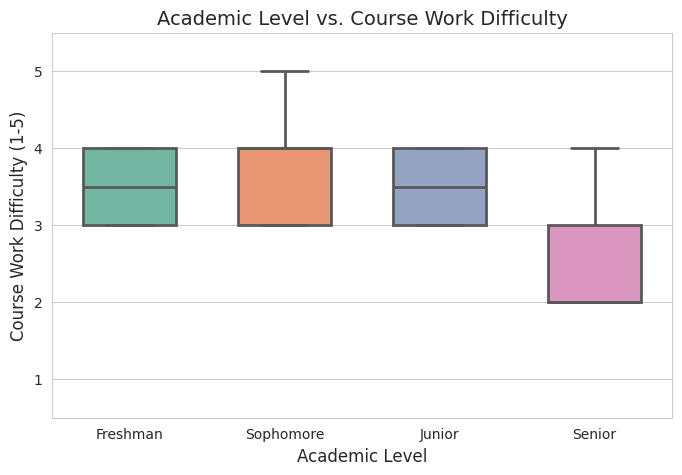

In [ ]:
# Box plot to compare academic level vs. Course Work Difficulty
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# Create the box plot
sns.boxplot(x="Academic Level",
            y="How difficult do you find CS coursework?",
            data=df_cleaned,
            palette="Set2",
            order=["Freshman", "Sophomore", "Junior", "Senior"],
            showcaps=True, showfliers=True, width=0.6, linewidth=2)

# Adjust y-axis scale to fit all values
plt.ylim(0.5, 5.5)

# Add labels & title
plt.xlabel("Academic Level", fontsize=12)
plt.ylabel("Course Work Difficulty (1-5)", fontsize=12)
plt.title("Academic Level vs. Course Work Difficulty", fontsize=14)

# Show plot

This visualization shows Course work diffuculty levels (rated 1-5) across different academic levels.

Freshmen, Sophomores, and Juniors have similar levels of career preparation, with a median around 3-4, suggesting moderate confidence in their readiness.

Seniors, however, show the lowest median and the widest variability, with some feeling well-prepared while others report low confidence (around 2).

This suggests that while students generally gain career preparation over time, some seniors still feel unprepared, possibly due to job market concerns or uncertainties about post-graduation plans.









In [ ]:
# Calculate Mean, Median, Mode for career prepration levels
mean_values = df_cleaned.groupby("Academic Level", observed=True)["How difficult do you find CS coursework?"].mean().round(2)
median_values = df_cleaned.groupby("Academic Level", observed=True)["How difficult do you find CS coursework?"].median()
mode_values = df_cleaned.groupby("Academic Level", observed=True)["How difficult do you find CS coursework?"].agg(lambda x: stats.mode(x, keepdims=True).mode[0] if not x.empty else None)

# Combine into a DataFrame
summary_table = pd.DataFrame({
    "Mean": mean_values,  # Convert to int for cleaner display
    "Median": median_values,
    "Mode": mode_values
})

# Display table
print(summary_table)

                Mean  Median  Mode
Academic Level                    
Freshman        3.50     3.5     3
Sophomore       3.58     4.0     3
Junior          3.50     3.5     3
Senior          2.67     2.0     2


Correlation in the data

In [ ]:
# Ensure Academic Level is numeric
df_cleaned["Academic Level (Numeric)"] = df_cleaned["Academic Level"].astype("category").cat.codes

# Convert relevant columns to numeric
df_cleaned["How confident are you in your coding skills?"] = pd.to_numeric(df_cleaned["How confident are you in your coding skills?"], errors='coerce')
df_cleaned["How prepared do you feel for CS-related internships or jobs?"] = pd.to_numeric(df_cleaned["How prepared do you feel for CS-related internships or jobs?"], errors='coerce')
df_cleaned["How stressful do you find being a CS student?"] = pd.to_numeric(df_cleaned["How stressful do you find being a CS student?"], errors='coerce')

# Drop NaN values
df_cleaned = df_cleaned.dropna()

# Extract relevant columns
coding_confidence = df_cleaned["How confident are you in your coding skills?"]
career_preparation = df_cleaned["How prepared do you feel for CS-related internships or jobs?"]
academic_level_numeric = df_cleaned["Academic Level (Numeric)"]
stress_levels = df_cleaned["How stressful do you find being a CS student?"]

# Compute correlation coefficients
def compute_correlation(x, y):
    return pearsonr(x, y)[0]

correlations = {
    "Coding Confidence vs. Career Preparation": compute_correlation(coding_confidence, career_preparation),
    "Academic Level vs. Coding Confidence": compute_correlation(academic_level_numeric, coding_confidence),
    "Stress Levels vs. Career Preparation": compute_correlation(stress_levels, career_preparation)
}

# Print correlation results
print("Correlation Coefficients:")
for key, value in correlations.items():
    print(f"{key}: {value:.4f}")


Correlation Coefficients:
Coding Confidence vs. Career Preparation: 0.4983
Academic Level vs. Coding Confidence: 0.6412
Stress Levels vs. Career Preparation: -0.1104


Coding Confidence vs. Career Preparation → 0.4983
→ Moderate positive correlation: Higher coding confidence tends to be associated with better career preparation.

Academic Level vs. Coding Confidence → 0.6412
→ Strong positive correlation: Higher academic level is strongly linked to higher coding confidence.

Stress Levels vs. Career Preparation → -0.1104
→ Weak negative correlation: Higher stress levels slightly correlate with lower career preparation, but the effect is small.